In [5]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [6]:
common_config.figure_journal_basic()

In [7]:
import pertpy as pt
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#adata = sc.read_h5ad("data/zhang_preprocessed.h5ad")
#adata

In [ ]:
adata.obs["Group"].value_counts()

In [4]:
adata = ad.read_h5ad("dialogue_output/dialogue_lp.h5ad")
adata

AnnData object with n_obs × n_vars = 42550 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'n_counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9'
    obsm: 'X_pca', 'X_umap'

In [ ]:
associations_df = #TODO

## Dotplot

In [ ]:
cell_types = associations_df.index

plot_df = {"Cell type": [], "y_pos": [], "MCP":[], "Mean MCP Score": [], "x_pos": [], "Significance": [], "-log10(p)":[]}

for mcp_nr in range(10):
    for ct_nr, cell_type in enumerate(cell_types):
        plot_df["Cell type"].append(cell_type)
        plot_df["y_pos"].append(ct_nr)
        plot_df["MCP"].append(f"MCP {mcp_nr}")
        plot_df["Mean MCP Score"].append(adata[adata.obs["cell_type"] == cell_type].obs[f"mcp_{mcp_nr}"].mean())
        plot_df["x_pos"].append(mcp_nr)
        plot_df["Significance"].append(associations_df.loc[cell_type, f"mcp_{mcp_nr}"] < 0.1)
        plot_df["-log10(p)"].append(-1 * np.log10(associations_df.loc[cell_type, f"mcp_{mcp_nr}"]))

plot_df = pd.DataFrame(plot_df)

plt.figure(figsize=(3, 6))
#plt.scatter(plot_df["x_pos"], plot_df["y_pos"], s=plot_df["Mean MCP Score"]*1000, c=plot_df["Significance"], cmap="coolwarm") #
max = abs(plot_df["Mean MCP Score"]).max()
plt.scatter(plot_df["x_pos"], plot_df["y_pos"], s=plot_df["-log10(p)"]*100, c=plot_df["Mean MCP Score"], cmap="bwr", vmin=-max, vmax=max)
plt.xticks(range(6), [f"MCP {i}" for i in range(6)], rotation=90)
plt.yticks(range(len(cell_types)), cell_types)

cbar = plt.colorbar()
cbar.set_label("Mean MCP Score")
plt.show()

## Pairplot for MCP 1

In [9]:
adata.obs["Cluster"].value_counts()

Cluster
t_Tn-LEF1           11533
t_Bmem-CD27          7283
t_CD8_Tem-GZMK       6592
t_pB-IGHG1           4943
t_CD4_Treg-FOXP3     4073
t_CD4_Tcm-LMNA       3699
t_CD8_Trm-ZNF683     2464
t_CD8_MAIT-KLRB1     1633
t_mono-FCN1           330
Name: count, dtype: int64

{'t_CD4_Treg-FOXP3': [], 't_Tn-LEF1': [], 't_mono-FCN1': [], 'Efficacy': []}


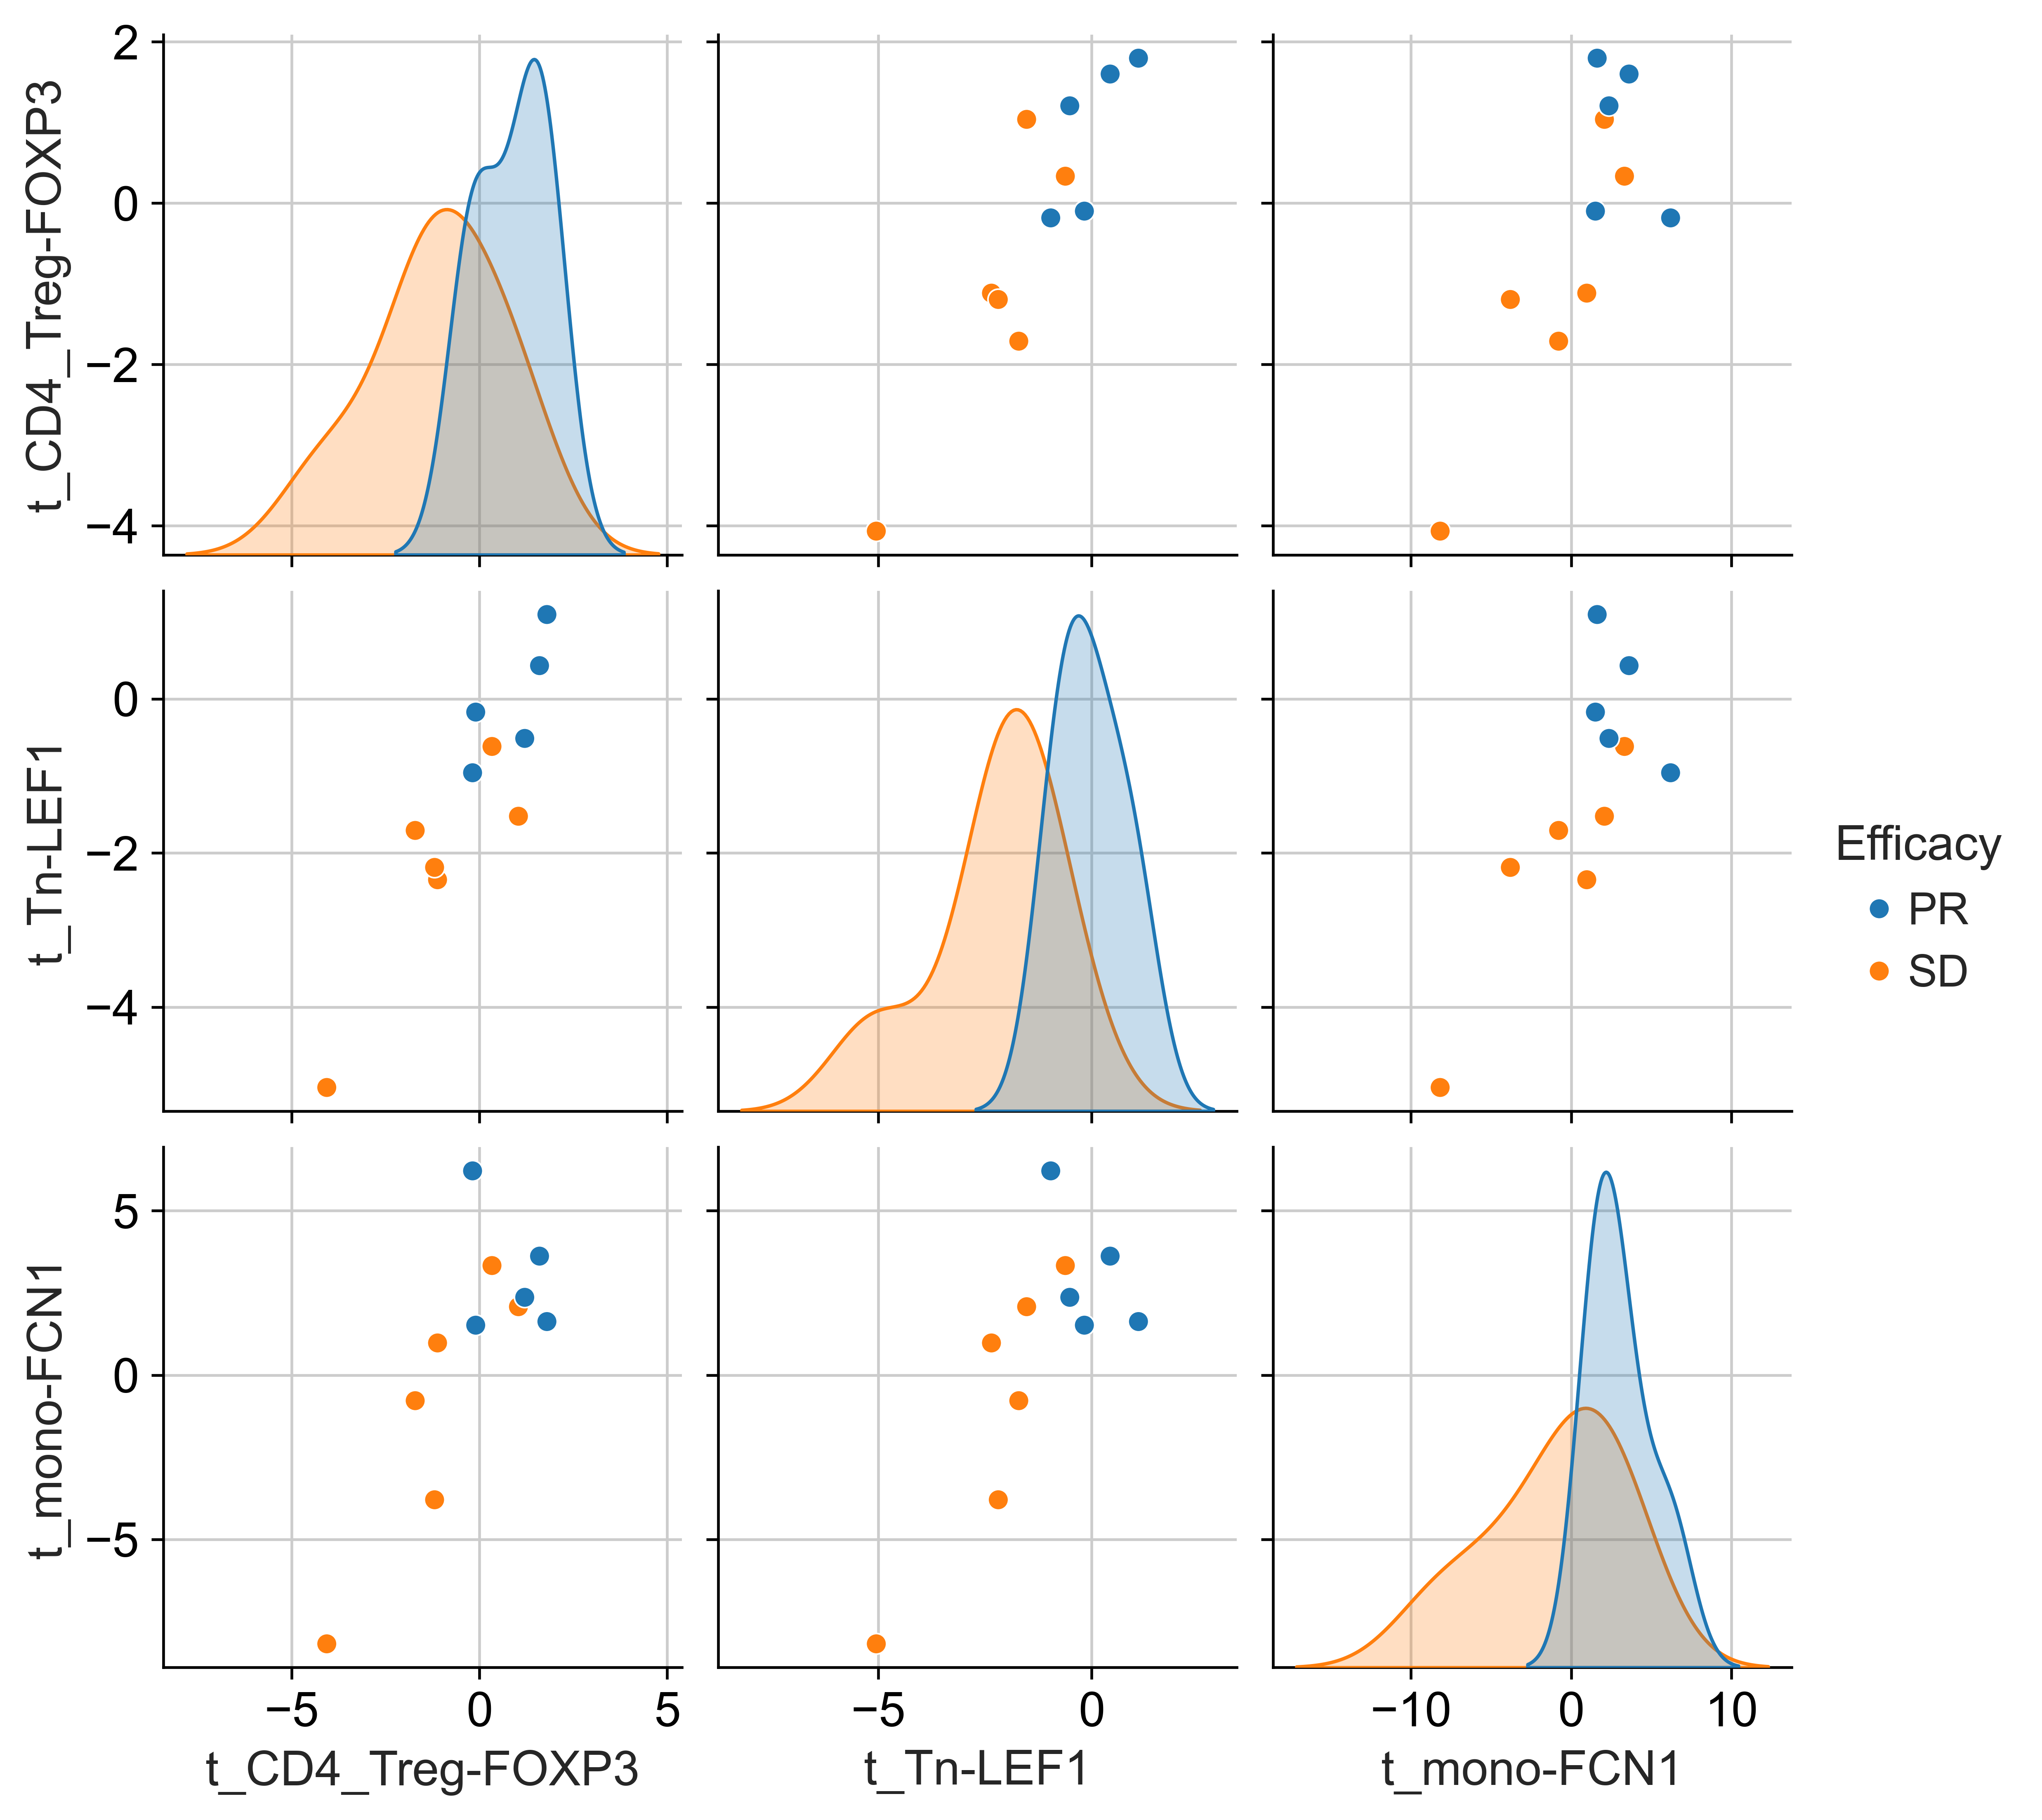

In [20]:
cell_types = ["t_CD4_Treg-FOXP3", "t_Tn-LEF1", "t_mono-FCN1"]

plot_df = {cell_type: [] for cell_type in cell_types}
plot_df["Efficacy"] = []
print(plot_df)

for sample in adata.obs["Sample"].unique():
    efficacy = adata[adata.obs["Sample"] == sample].obs["Efficacy"].unique()[0]
    plot_df["Efficacy"].append(efficacy)
    for cell_type in cell_types:
        plot_df[cell_type].append(adata[(adata.obs["Sample"] == sample) & (adata.obs["Cluster"] == cell_type)].obs["mcp_1"].mean())
        
plot_df = pd.DataFrame(plot_df)

sns.pairplot(plot_df, hue="Efficacy")

In [19]:
plot_df

{'t_CD4_Treg-FOXP3': [1.7978303347969784,
  1.6011482713589904,
  0.33412940708151695,
  1.0391367712044657,
  -1.116182474409249,
  -1.1948057808187391,
  -0.09902669708894275,
  1.2069541163223043,
  -0.18299741158835187,
  -1.7119160201543422,
  -4.067712889098412],
 't_Tn-LEF1': [1.0944640079323928,
  0.4312213145079479,
  -0.6175826190901047,
  -1.523463214270957,
  -2.347298921373021,
  -2.1874646480432967,
  -0.1718223829447235,
  -0.5135240553263763,
  -0.9591483688430271,
  -1.7075040695643673,
  -5.0434239009118595],
 't_mono-FCN1': [1.6281551894738078,
  3.6193134207958972,
  3.332937764712946,
  2.0805192401477397,
  0.9773309141793726,
  -3.795259280926714,
  1.518125470483943,
  2.3659220732723516,
  6.214140543058504,
  -0.7796036442366261,
  -8.179420346311124],
 'Efficacy': ['PR',
  'PR',
  'PR',
  'PR',
  'PR',
  'PR',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'SD',
  'PR',
  'PR',
  'PR',
  'PR',
  'PR',
  'PR',
  'PR',